### Задание 0. 

Посчитайте 2 шага градиентного спуска для примера, который мы разбирали на занятии, с учетом свободного коэффициента (то есть, надо посчитать не только градиенты по $w_1$, но и по $w_0$.

Будем считать, что наша выборка состоит из следующих объектов:

 № | x | $y_{true}$ |
| --- | --- | --- |
| 1 | 3 | 7 |
| 2 | 5 | 11 |

Веса инициализируем как $w_1 = 1$ и $w_0 = 0$. Возьмем $\eta = 0.01$.

In [39]:
import pandas as pd

def dMSE_w1(i, y, w1, x, w0):
    return -2 * 1/i * (y - w1 * x - w0) * x

def dMSE_w0(i, y, w1, x, w0):
    return -2 * 1/i * (y - w1 * x - w0)

w1 = 1
w0 = 0
n = 0.01

dict = {'x': [3, 5], 'Ytrue': [7, 11]}
df = pd.DataFrame(dict)

for i in range(2):
    x = df['x'][i]
    y = df['Ytrue'][i]
    c1 = w1 - n * dMSE_w1(i + 1, y, w1, x, w0)
    c2 = w1 - n * dMSE_w0(i + 1, y, w1, x, w0)
    print(f'{c1}, {c2}')



1.24, 1.08
1.3, 1.06


# Задание 1. 

Поработайте с датасетом про цены мобильных телефонов, обучите регрессию. 

In [40]:
data = pd.read_csv('Cellphone.csv')
data.head(10)


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
5,947,2137,12,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
6,774,1238,13,134.1,4.0,233,2,1.20,8.0,1.000,2.00,0.0,1560,11.7
7,947,2137,13,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
8,99,1315,14,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
9,1103,2580,15,145.0,5.1,432,4,2.50,16.0,2.000,16.00,2.0,2800,8.1


In [41]:
data.tail(10)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
151,851,3055,2173,158.0,5.50,401,4,1.875,64.0,6.0,16.0,8.0,3000,7.4
152,290,4361,3248,238.0,5.70,515,8,1.950,128.0,6.0,12.0,8.0,7000,7.4
153,290,4361,3291,238.0,5.70,515,8,1.950,128.0,6.0,12.0,8.0,7000,7.4
154,1131,2536,3619,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4
155,1206,3551,4408,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


In [42]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Series([], dtype: float64) %


In [43]:
#дропнем product_id
data.drop('Product_id', axis=1, inplace=True)
data.dtypes

Price             int64
Sale              int64
weight          float64
resoloution     float64
ppi               int64
cpu core          int64
cpu freq        float64
internal mem    float64
ram             float64
RearCam         float64
Front_Cam       float64
battery           int64
thickness       float64
dtype: object

<AxesSubplot:>

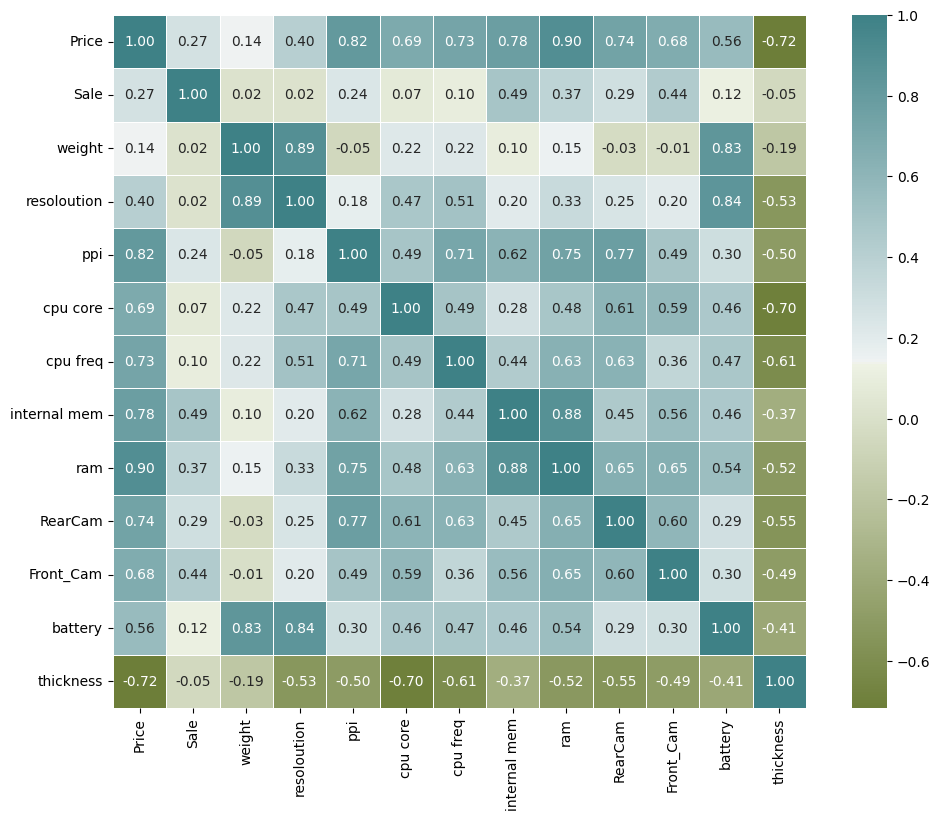

In [44]:
from matplotlib import pylab as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

<AxesSubplot:>

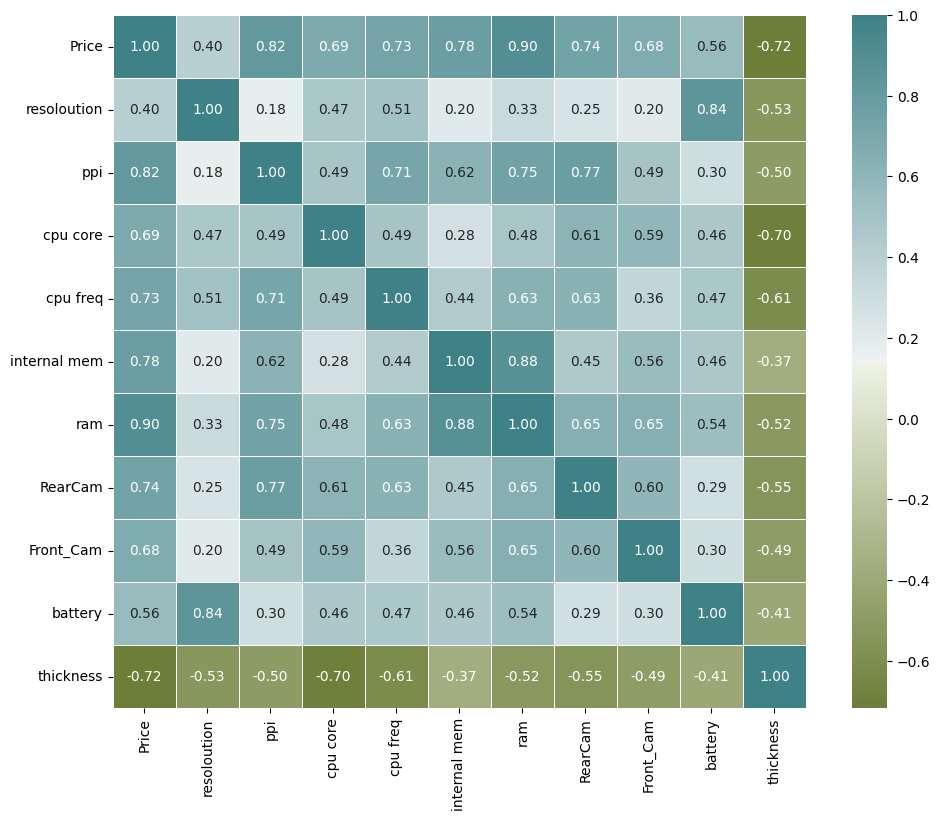

In [45]:
#weight и sale слабо коррелируют с ценой
data.drop('Sale', axis=1, inplace=True)
data.drop('weight', axis=1, inplace=True)

plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [46]:
data.shape

(161, 11)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Y = data['Price']
X = data.drop('Price', axis=1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

model = LinearRegression()

model.fit(Xtrain, ytrain)

coef = model.coef_
intercept = model.intercept_ 

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
print(coefficients)
print(f'''Свободный коэффициент:  {intercept}''')

              0           0
0   resoloution  -76.090453
1           ppi    1.035055
2      cpu core   55.736390
3      cpu freq  147.483311
4  internal mem    6.285093
5           ram   97.279289
6       RearCam    4.008879
7     Front_Cam    5.751623
8       battery    0.092820
9     thickness  -75.720298
Свободный коэффициент:  1762.7192583380152


In [48]:
pred_test = model.predict(Xtest)

mean_squared_error(pred_test, ytest) ** 0.5

157.4399139318289

In [49]:
pred_train = model.predict(Xtrain)

mean_squared_error(pred_train, ytrain) ** 0.5

171.36568506410254

In [50]:
from sklearn.metrics import r2_score

print(r2_score(pred_train, ytrain), r2_score(pred_test, ytest))

#rmse на тренировочных данных больше, чем на тестовых, т. е. модель переучилась?

0.9492985080924897 0.9485729959375641


# Задание 2. 

Поработайте с датасетом diet_data (Его создатель решил похудеть, подсчитывая калории, и ему это действительно удалось; в течение времени, пока худел, он записывал, что и какое он ест). Целевая колонка - change. 

In [69]:
data = pd.read_csv('diet_data.csv')
data.head(10)

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0
5,8/4/2018,11.0,13.0,6.0,2678.0,3600.0,1.34,0.0,0.0,0.0,0.0,0.0,0.0,14.0
6,8/5/2018,12.0,0.0,4.0,2692.0,2400.0,0.89,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
7,8/6/2018,12.0,0.0,2.0,2690.0,3100.0,1.15,1.0,1.0,0.0,0.0,0.0,0.0,6.0
8,8/7/2018,12.0,0.0,8.0,2696.0,2200.0,0.82,1.0,1.0,0.0,0.0,0.0,0.0,-8.0
9,8/8/2018,12.0,0.0,0.0,2688.0,1800.0,0.67,1.0,1.0,0.0,0.0,0.0,0.0,-40.0


In [70]:
#дропнем даты, пускай вес останется только в одной колонке в унциях, приведем в порядок столбцы

data.drop('Date', axis=1, inplace=True)

missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

data = data.dropna(0)
data.drop('Stone', axis=1, inplace=True)
data.drop('Pounds', axis=1, inplace=True)
data.drop('Ounces', axis=1, inplace=True)


data.info()

calories       7.284768
five_donuts    7.284768
walk           7.284768
run            7.284768
wine           7.284768
prot           7.284768
weight         7.284768
Stone          5.960265
Pounds         5.960265
Ounces         5.960265
cals_per_oz    2.649007
change         2.649007
weight_oz      1.324503
dtype: float64 %
<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 142
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weight_oz    140 non-null    float64
 1   calories     140 non-null    float64
 2   cals_per_oz  140 non-null    object 
 3   five_donuts  140 non-null    float64
 4   walk         140 non-null    float64
 5   run          140 non-null    float64
 6   wine         140 non-null    float64
 7   prot         140 non-null    float64
 8   weight       140 non-null    float64
 9   change       140 non-null    float64
dtypes: float64(9), object(1)
memory usage: 12.0+ KB


C:\Users\Mariya\AppData\Local\Temp\ipykernel_6220\2979910645.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  data = data.dropna(0)


In [71]:
data['cals_per_oz'] = data['cals_per_oz'].apply(lambda x: float(x))

for elem in data.columns:
    print(data[elem].unique())
data['five_donuts'] = data['five_donuts'].apply(lambda x: 1 if x == 1.0 else 0)
data['walk'] = data['walk'].apply(lambda x: 1 if x == 1.0 else 0)
data['run'] = data['run'].apply(lambda x: 1 if x == 1.0 else 0)
data['prot'] = data['prot'].apply(lambda x: 1 if x == 1.0 else 0)
data['weight'] = data['weight'].apply(lambda x: 1 if x == 1.0 else 0)
data['wine'] = data['wine'].apply(lambda x: 1 if x == 1.0 else 0)


[2726. 2696. 2704. 2664. 2678. 2692. 2690. 2688. 2648. 2630. 2642. 2676.
 2662. 2658. 2680. 2694. 2710. 2672. 2646. 2660. 2706. 2674. 2656. 2640.
 2724. 2752. 2768. 2736. 2756. 2744. 2742. 2708. 2740. 2738. 2722. 2758.
 2720. 2632. 2628.]
[1950. 2600. 2500. 1850. 2900. 3600. 2400. 3100. 2200. 1800. 2300. 3000.
 4000. 2800. 2100. 2450. 3400. 4200. 2000. 2150. 4150. 5400. 1700. 3250.
 4800. 4600. 3800. 5200. 2350. 6300. 5650. 5900. 2250. 4400. 3050. 1900.
 2550. 5800. 5150. 4300. 1500. 1400. 1600. 4900. 6450. 3200. 3750. 3500.
 2850. 2750. 2950. 7550. 1550. 3300. 5350. 3550. 3700. 4250. 2050. 5850.
 5050. 6200. 7050. 3150. 6400. 4700. 4100. 9150. 5750.]
[0.72 0.96 0.92 0.68 1.09 1.34 0.89 1.15 0.82 0.67 0.87 1.14 1.51 1.05
 0.86 0.9  0.79 0.93 1.28 1.56 0.74 0.8  1.06 0.76 1.57 2.03 0.63 0.81
 1.23 1.58 1.78 1.7  0.66 0.94 1.43 1.16 1.93 0.78 0.88 2.37 2.11 2.19
 0.83 0.97 2.02 1.63 1.13 0.71 0.95 1.88 0.55 0.52 1.08 0.59 1.83 2.39
 0.84 0.85 1.2  1.26 0.7  1.6  1.4  1.31 1.02 2.81 0.51 

<AxesSubplot:>

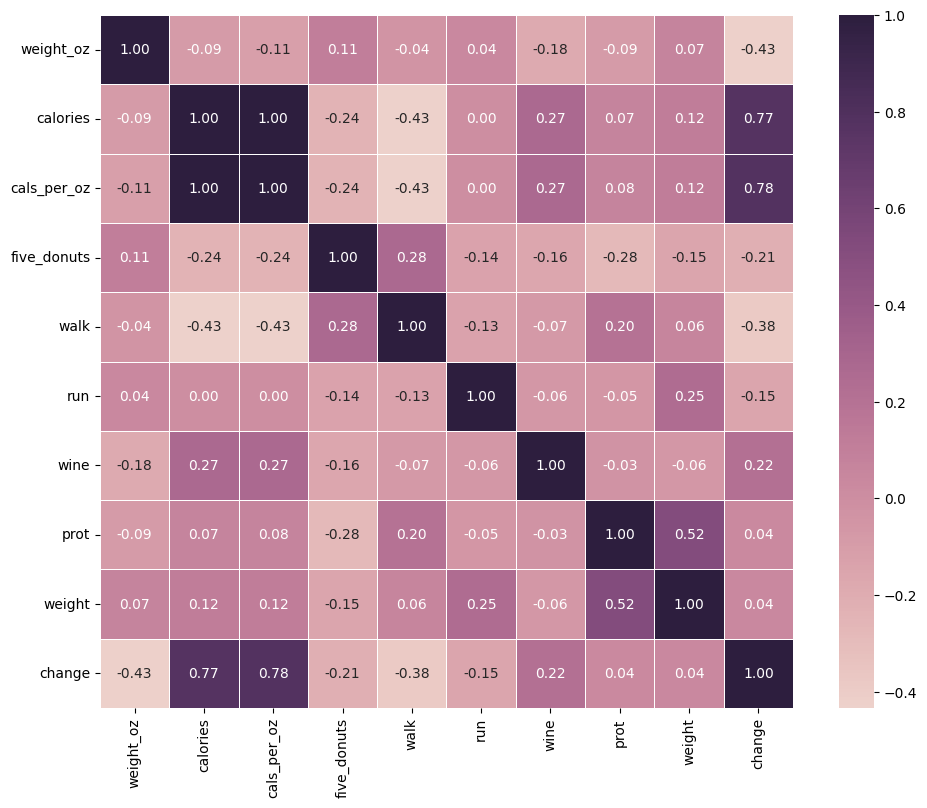

In [81]:
plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.cubehelix_palette(as_cmap=True), square=True)

In [82]:
data.drop('prot', axis=1, inplace=True)
data.drop('weight', axis=1, inplace=True)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Y = data['change']
X = data.drop('change', axis=1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

model = LinearRegression()

model.fit(Xtrain, ytrain)

coef = model.coef_
intercept = model.intercept_ 

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
print(coefficients)
print(f'''Свободный коэффициент:  {intercept}''')

             0           0
0    weight_oz   -0.242643
1     calories   -0.115757
2  cals_per_oz  342.760319
3  five_donuts    2.262426
4         walk   -7.423818
5          run   -9.493370
6         wine   -1.616828
Свободный коэффициент:  620.5681682524497


In [84]:
pred_test = model.predict(Xtest)

mean_squared_error(pred_test, ytest) ** 0.5

17.243746439817283

In [85]:
pred_train = model.predict(Xtrain)

mean_squared_error(pred_train, ytrain) ** 0.5

#модель недоучилась?

11.194563904442068

In [86]:
from sklearn.metrics import r2_score

print(r2_score(pred_train, ytrain), r2_score(pred_test, ytest))

#ну и точность, кажется, оставляет желать лучшего

0.752460396305903 0.46157477139094105


# Задание 3. 

Поработайте с датасетом Life Expectancy. Целевая колонка - Life Expectancy, собственно. 

In [17]:
data = pd.read_csv('Life Expectancy Data.csv')
data.columns
for elem in data.columns:
    print(data.elem)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
# your code here